<a href="https://colab.research.google.com/github/waristh/Indonesia_Covid19_With_Folium/blob/main/Folium_DataCovidIndonesia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install folium

In [2]:
import folium
import numpy as np

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
cd /content/gdrive/MyDrive/GIS

/content/gdrive/MyDrive/GIS


In [5]:
#Buat function untuk ambil data covid dunia
import requests
def get_json(api_url):
    response = requests.get(api_url)
    if response.status_code == 200:
        return json.loads(response.content.decode('utf-8'))
    else:
        return None

In [6]:
#Grep data hari ini
import datetime
import pandas as pd
import json
record_date = datetime.date.today().strftime('%Y-%m-%d')
Propinsi = ['ACEH','SUMATERA_UTARA','SUMATERA_BARAT','SUMATERA_SELATAN','RIAU','JAMBI','BENGKULU','KEPULAUAN_BANGKA_BELITUNG','KEPULAUAN_RIAU','LAMPUNG',
            'DKI_JAKARTA','BANTEN','JAWA_BARAT','JAWA_TENGAH','JAWA_TIMUR','DAERAH_ISTIMEWA_YOGYAKARTA',
            'BALI','NUSA_TENGGARA_BARAT','NUSA_TENGGARA_TIMUR',
            'KALIMANTAN_BARAT','KALIMANTAN_TIMUR','KALIMANTAN_TENGAH','KALIMANTAN_SELATAN','KALIMANTAN_UTARA',
            'SULAWESI_BARAT','SULAWESI_TENGGARA','SULAWESI_SELATAN','SULAWESI_TENGAH','GORONTALO','SULAWESI_UTARA',
            'MALUKU','MALUKU_UTARA','PAPUA','PAPUA_BARAT',]

In [7]:
# Data_Covid = pd.DataFrame(columns=['tanggal', 'KASUS', 'MENINGGAL', 'SEMBUH', 'DIRAWAT_OR_ISOLASI',
#        'AKUMULASI_KASUS', 'AKUMULASI_SEMBUH', 'AKUMULASI_MENINGGAL',
#        'AKUMULASI_DIRAWAT_OR_ISOLASI','Propinsi'])

# for prov in Propinsi:
#   data_prov = pd.io.json.json_normalize(get_json(f'https://data.covid19.go.id/public/api/prov_detail_{prov}.json')['list_perkembangan'][0:])
#   #menambahkan kolom Propinsi berdasarkan Propinsinya
#   data_prov['Propinsi'] = f'{prov}'
#   #meng convert kolom tanggal dari format Timestamp ke Tanggal
#   data_prov['tanggal'] = pd.DataFrame(pd.to_datetime(data_prov['tanggal'].values.astype(dtype='datetime64[ms]')))

#   Data_Covid = pd.concat([Data_Covid,data_prov])
#   #save data per Propinsi ke excel
#   data_prov.to_excel(f'DataCovid_{prov}.xlsx',index=False)

In [8]:
import glob
#Membaca semua data kemudian menggabungkannya menjadi satu
Data_Covid = pd.DataFrame(columns=['tanggal', 'KASUS', 'MENINGGAL', 'SEMBUH', 'DIRAWAT_OR_ISOLASI',
       'AKUMULASI_KASUS', 'AKUMULASI_SEMBUH', 'AKUMULASI_MENINGGAL',
       'AKUMULASI_DIRAWAT_OR_ISOLASI','Propinsi'])
files = glob.glob(r'DataCovid*.xlsx')
for f in files:
    print(f)
    Data = pd.read_excel(f'{f}')
    Data_Covid = pd.concat([Data_Covid,Data])
    print(Data_Covid.shape)



DataCovid_ACEH.xlsx
(505, 10)
DataCovid_SUMATERA_UTARA.xlsx
(1019, 10)
DataCovid_SUMATERA_BARAT.xlsx
(1524, 10)
DataCovid_SUMATERA_SELATAN.xlsx
(2032, 10)
DataCovid_BENGKULU.xlsx
(2532, 10)
DataCovid_JAMBI.xlsx
(3043, 10)
DataCovid_RIAU.xlsx
(3572, 10)
DataCovid_KEPULAUAN_BANGKA_BELITUNG.xlsx
(4073, 10)
DataCovid_LAMPUNG.xlsx
(4578, 10)
DataCovid_KEPULAUAN_RIAU.xlsx
(5090, 10)
DataCovid_BANTEN.xlsx
(5615, 10)
DataCovid_DKI_JAKARTA.xlsx
(6145, 10)
DataCovid_JAWA_BARAT.xlsx
(6674, 10)
DataCovid_JAWA_TENGAH.xlsx
(7197, 10)
DataCovid_JAWA_TIMUR.xlsx
(7780, 10)
DataCovid_NUSA_TENGGARA_BARAT.xlsx
(8280, 10)
DataCovid_BALI.xlsx
(8800, 10)
DataCovid_DAERAH_ISTIMEWA_YOGYAKARTA.xlsx
(9315, 10)
DataCovid_NUSA_TENGGARA_TIMUR.xlsx
(9806, 10)
DataCovid_KALIMANTAN_BARAT.xlsx
(10308, 10)
DataCovid_KALIMANTAN_TIMUR.xlsx
(10825, 10)
DataCovid_KALIMANTAN_TENGAH.xlsx
(11330, 10)
DataCovid_KALIMANTAN_UTARA.xlsx
(11833, 10)
DataCovid_SULAWESI_BARAT.xlsx
(12336, 10)
DataCovid_KALIMANTAN_SELATAN.xlsx
(12837, 

In [9]:
Data_Covid

tanggal KASUS  ... AKUMULASI_DIRAWAT_OR_ISOLASI Propinsi
0   2020-03-26     1  ...                            1     ACEH
1   2020-03-27     3  ...                            4     ACEH
2   2020-03-28     1  ...                            5     ACEH
3   2020-03-29     0  ...                            5     ACEH
4   2020-03-30     0  ...                            5     ACEH
..         ...   ...  ...                          ...      ...
504 2021-08-08    94  ...                        14997    PAPUA
505 2021-08-09   135  ...                        11766    PAPUA
506 2021-08-10   205  ...                        11653    PAPUA
507 2021-08-11   175  ...                        11664    PAPUA
508 2021-08-12   224  ...                        11790    PAPUA

[17401 rows x 10 columns]

In [10]:
Data_Covid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17401 entries, 0 to 508
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   tanggal                       17401 non-null  datetime64[ns]
 1   KASUS                         17401 non-null  object        
 2   MENINGGAL                     17401 non-null  object        
 3   SEMBUH                        17401 non-null  object        
 4   DIRAWAT_OR_ISOLASI            17401 non-null  object        
 5   AKUMULASI_KASUS               17401 non-null  object        
 6   AKUMULASI_SEMBUH              17401 non-null  object        
 7   AKUMULASI_MENINGGAL           17401 non-null  object        
 8   AKUMULASI_DIRAWAT_OR_ISOLASI  17401 non-null  object        
 9   Propinsi                      17401 non-null  object        
dtypes: datetime64[ns](1), object(9)
memory usage: 1.5+ MB


In [11]:
Data_Covid['tanggal'] = pd.to_datetime(Data_Covid['tanggal']).astype(int) / 10**9
Data_Covid['tanggal'] = Data_Covid['tanggal'].astype(int).astype(str)

In [12]:
#Merubah data angka meenjadi integer
Data_Covid[['KASUS', 'MENINGGAL', 'SEMBUH', 'DIRAWAT_OR_ISOLASI',
       'AKUMULASI_KASUS', 'AKUMULASI_SEMBUH', 'AKUMULASI_MENINGGAL',
       'AKUMULASI_DIRAWAT_OR_ISOLASI',]] = Data_Covid[['KASUS', 'MENINGGAL', 'SEMBUH', 'DIRAWAT_OR_ISOLASI',
       'AKUMULASI_KASUS', 'AKUMULASI_SEMBUH', 'AKUMULASI_MENINGGAL',
       'AKUMULASI_DIRAWAT_OR_ISOLASI',]].astype(int)

In [13]:
Data_Covid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17401 entries, 0 to 508
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   tanggal                       17401 non-null  object
 1   KASUS                         17401 non-null  int64 
 2   MENINGGAL                     17401 non-null  int64 
 3   SEMBUH                        17401 non-null  int64 
 4   DIRAWAT_OR_ISOLASI            17401 non-null  int64 
 5   AKUMULASI_KASUS               17401 non-null  int64 
 6   AKUMULASI_SEMBUH              17401 non-null  int64 
 7   AKUMULASI_MENINGGAL           17401 non-null  int64 
 8   AKUMULASI_DIRAWAT_OR_ISOLASI  17401 non-null  int64 
 9   Propinsi                      17401 non-null  object
dtypes: int64(8), object(2)
memory usage: 1.5+ MB


# Set Data Geo JSON

In [14]:
!pip install geopandas

     |████████████████████████████████| 994 kB 4.3 MB/s 
     |████████████████████████████████| 6.6 MB 33.3 MB/s 
     |████████████████████████████████| 15.4 MB 36 kB/s 


In [15]:
# import geojson
# with open('indonesia-prov.geojson') as f:
#     gj = geojson.load(f)
# indo_geojson = gj['features']
# indo_geojson

In [16]:
import geopandas
indo_geojson = geopandas.read_file('indonesia-prov.geojson')
print(indo_geojson)
print(indo_geojson.columns)

    ID  ...                                           geometry
0    2  ...  MULTIPOLYGON (((117.62720 -8.50640, 117.63470 ...
1    3  ...  POLYGON ((122.18814 1.04530, 122.22627 1.00335...
2    4  ...  MULTIPOLYGON (((120.98423 -2.83534, 121.07834 ...
3    5  ...  POLYGON ((110.01183 -7.88690, 110.04295 -7.892...
4    6  ...  MULTIPOLYGON (((108.82934 -6.74608, 108.85489 ...
5    7  ...  MULTIPOLYGON (((106.72134 -6.09000, 106.69272 ...
6    8  ...  MULTIPOLYGON (((111.69460 -6.75286, 111.83282 ...
7    9  ...  MULTIPOLYGON (((127.74207 0.81629, 127.79740 0...
8   10  ...  MULTIPOLYGON (((130.83130 -3.47141, 130.80590 ...
9   11  ...  MULTIPOLYGON (((115.75000 -1.31434, 115.75000 ...
10  12  ...  MULTIPOLYGON (((114.20497 1.40755, 114.15383 1...
11  13  ...  MULTIPOLYGON (((119.59165 -4.55424, 119.59671 ...
12  14  ...  POLYGON ((106.72134 -6.09000, 106.74184 -6.106...
13  15  ...  POLYGON ((106.39610 -6.97980, 106.39060 -6.904...
14  16  ...  MULTIPOLYGON (((140.68666 -2.47778, 140.74

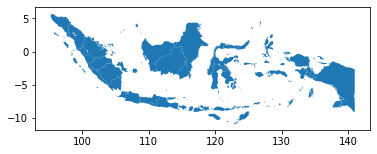

In [17]:
indo_geojson.plot()

In [18]:
sorted_df  = Data_Covid.sort_values(['Propinsi',
                     'tanggal']).reset_index(drop=True)

In [19]:
sum_df  = sorted_df.groupby(['Propinsi', 'tanggal'], as_index=False).sum()
sum_df.head()

Propinsi     tanggal  ...  AKUMULASI_MENINGGAL  AKUMULASI_DIRAWAT_OR_ISOLASI
0     ACEH  1585180800  ...                    0                             1
1     ACEH  1585267200  ...                    0                             4
2     ACEH  1585353600  ...                    0                             5
3     ACEH  1585440000  ...                    0                             5
4     ACEH  1585526400  ...                    0                             5

[5 rows x 10 columns]

In [20]:
joined_df = sum_df.merge(indo_geojson, on='Propinsi')
joined_df.head()

Propinsi  ...                                           geometry
0     ACEH  ...  MULTIPOLYGON (((98.25574 4.29095, 98.14540 4.2...
1     ACEH  ...  MULTIPOLYGON (((98.25574 4.29095, 98.14540 4.2...
2     ACEH  ...  MULTIPOLYGON (((98.25574 4.29095, 98.14540 4.2...
3     ACEH  ...  MULTIPOLYGON (((98.25574 4.29095, 98.14540 4.2...
4     ACEH  ...  MULTIPOLYGON (((98.25574 4.29095, 98.14540 4.2...

[5 rows x 14 columns]

In [21]:
joined_df['log_Confirmed'] = np.log10(joined_df['AKUMULASI_KASUS'])
joined_df.head()

Propinsi  ... log_Confirmed
0     ACEH  ...       0.00000
1     ACEH  ...       0.60206
2     ACEH  ...       0.69897
3     ACEH  ...       0.69897
4     ACEH  ...       0.69897

[5 rows x 15 columns]

In [22]:
joined_df = joined_df[['Propinsi', 'tanggal', 'AKUMULASI_KASUS', 'geometry']]
joined_df['AKUMULASI_KASUS'] = joined_df['AKUMULASI_KASUS'] / 1000
joined_df.head()

Propinsi  ...                                           geometry
0     ACEH  ...  MULTIPOLYGON (((98.25574 4.29095, 98.14540 4.2...
1     ACEH  ...  MULTIPOLYGON (((98.25574 4.29095, 98.14540 4.2...
2     ACEH  ...  MULTIPOLYGON (((98.25574 4.29095, 98.14540 4.2...
3     ACEH  ...  MULTIPOLYGON (((98.25574 4.29095, 98.14540 4.2...
4     ACEH  ...  MULTIPOLYGON (((98.25574 4.29095, 98.14540 4.2...

[5 rows x 4 columns]

# Setting warna dari setiap data akumulasi kasus

In [23]:
#Setting warna dari setiap data akumulasi kasus
import branca.colormap as cm
max_colour = max(joined_df['AKUMULASI_KASUS'])
min_colour = min(joined_df['AKUMULASI_KASUS'])
cmap = cm.linear.YlOrRd_09.scale(min_colour, max_colour)
joined_df['colour'] = joined_df['AKUMULASI_KASUS'].map(cmap)
joined_df.head()

Propinsi  ...     colour
0     ACEH  ...  #ffffccff
1     ACEH  ...  #ffffccff
2     ACEH  ...  #ffffccff
3     ACEH  ...  #ffffccff
4     ACEH  ...  #ffffccff

[5 rows x 5 columns]

In [24]:
propinsi_list = joined_df['Propinsi'].unique().tolist()
propinsi_idx = range(len(propinsi_list))

style_dict = {}
for i in propinsi_idx:
    propinsi = propinsi_list[i]
    result = joined_df[joined_df['Propinsi'] == propinsi]
    inner_dict = {}
    for _, r in result.iterrows():
        inner_dict[r['tanggal']] = {'color': r['colour'], 'opacity': 0.7}
    style_dict[str(i)] = inner_dict

style_dict

{'0': {'1585180800': {'color': '#ffffccff', 'opacity': 0.7},
  '1585267200': {'color': '#ffffccff', 'opacity': 0.7},
  '1585353600': {'color': '#ffffccff', 'opacity': 0.7},
  '1585440000': {'color': '#ffffccff', 'opacity': 0.7},
  '1585526400': {'color': '#ffffccff', 'opacity': 0.7},
  '1585612800': {'color': '#ffffccff', 'opacity': 0.7},
  '1585699200': {'color': '#ffffccff', 'opacity': 0.7},
  '1585785600': {'color': '#ffffccff', 'opacity': 0.7},
  '1585872000': {'color': '#ffffccff', 'opacity': 0.7},
  '1585958400': {'color': '#ffffccff', 'opacity': 0.7},
  '1586044800': {'color': '#ffffccff', 'opacity': 0.7},
  '1586131200': {'color': '#ffffccff', 'opacity': 0.7},
  '1586217600': {'color': '#ffffccff', 'opacity': 0.7},
  '1586304000': {'color': '#ffffccff', 'opacity': 0.7},
  '1586390400': {'color': '#ffffccff', 'opacity': 0.7},
  '1586476800': {'color': '#ffffccff', 'opacity': 0.7},
  '1586563200': {'color': '#ffffccff', 'opacity': 0.7},
  '1586649600': {'color': '#ffffccff', 'opa

In [25]:
#Buat Geodataframe masing2 propinsi
propinsi_df = joined_df[['geometry']]
propinsi_gdf = geopandas.GeoDataFrame(propinsi_df)
propinsi_gdf = propinsi_gdf.drop_duplicates().reset_index()
propinsi_gdf

index                                           geometry
0       0  MULTIPOLYGON (((98.25574 4.29095, 98.14540 4.2...
1     505  MULTIPOLYGON (((115.19494 -8.73232, 115.18025 ...
2    1025  MULTIPOLYGON (((106.72134 -6.09000, 106.69272 ...
3    1550  MULTIPOLYGON (((103.77725 -4.79643, 103.77754 ...
4    2050  POLYGON ((110.01183 -7.88690, 110.04295 -7.892...
5    2565  POLYGON ((106.72134 -6.09000, 106.74184 -6.106...
6    3095  POLYGON ((122.18814 1.04530, 122.22627 1.00335...
7    3585  POLYGON ((101.29416 -2.28020, 101.30608 -2.238...
8    4096  POLYGON ((106.39610 -6.97980, 106.39060 -6.904...
9    4625  MULTIPOLYGON (((108.82934 -6.74608, 108.85489 ...
10   5148  MULTIPOLYGON (((111.69460 -6.75286, 111.83282 ...
11   5731  MULTIPOLYGON (((114.20497 1.40755, 114.15383 1...
12   6233  MULTIPOLYGON (((115.75000 -1.31434, 115.75000 ...
13   6734  POLYGON ((110.72210 -3.00548, 110.74724 -2.952...
14   7239  MULTIPOLYGON (((113.91814 0.97933, 113.91911 0...
15   7756  MULTIPOLYGON (((105.10669 -2.02202, 105.12461 ...
16   8257  MULTIPOLYGON (((103.99194 1.13472, 104.01361 1...
17   8769  POLYGON ((103.77754 -4.79652, 103.77760 -4.796...
18   9274  MULTIPOLYGON (((130.83130 -3.47141, 130.80590 ...
19   9784  MULTIPOLYGON (((127.74207 0.81629, 127.79740 0...
20  10292  MULTIPOLYGON (((117.62720 -8.50640, 117.63470 ...
21  10792  MULTIPOLYGON (((122.61950 -8.40327, 122.67060 ...
22  11283  MULTIPOLYGON (((140.68666 -2.47778, 140.74722 ...
23  11792  MULTIPOLYGON (((134.23334 -1.74194, 134.22139 ...
24  12296  MULTIPOLYGON (((101.91405 -0.92096, 101.84528 ...
25  12825  MULTIPOLYGON (((119.16658 -3.48770, 119.10866 ...
26  13328  MULTIPOLYGON (((119.59165 -4.55424, 119.59671 ...
27  13840  MULTIPOLYGON (((119.55126 -0.86110, 119.62010 ...
28  14345  MULTIPOLYGON (((120.98423 -2.83534, 121.07834 ...
29  14866  MULTIPOLYGON (((123.46574 0.33031, 123.51918 0...
30  15371  MULTIPOLYGON (((99.16198 0.23181, 99.23553 0.3...
31  15876  POLYGON ((105.78560 -4.11710, 105.73650 -4.142...
32  16384  MULTIPOLYGON (((98.25574 4.29095, 98.25168 4.2...

In [26]:
from folium.plugins import TimeSliderChoropleth

slider_map = folium.Map([0.7893, 113.9213],zoom_start=5,min_zoom=5, max_bounds=True,tiles='cartodbpositron')

_ = TimeSliderChoropleth(
    data=propinsi_gdf.to_json(),
    styledict=style_dict,

).add_to(slider_map)

_ = cmap.add_to(slider_map)
cmap.caption = "AKUMULASI KASUS COVID-19 DI INDONESIA X 1000"


slider_map